In [25]:
from qiskit import QuantumCircuit, Aer, assemble, IBMQ, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex, plot_bloch_multivector
from qiskit.circuit import Gate
import qiskit.extensions as q_ext
from qiskit.quantum_info import Statevector
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.exceptions import QiskitError
from qiskit.quantum_info.operators import Operator

from qiskit.test.mock import FakeBoeblingen
backend = FakeBoeblingen()


import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
'''
Input: (a, b, c)
Output: (s,c)
'''
def volladdier(a, b, c):
    qc = QuantumCircuit(8,2)
    qc.x(0)
    qc.x(6)
    
    if b:
        qc.x(1)
    if c:
        qc.x(2)
    if a:
        qc.x(4)
        
    qc.ccx(1, 2, 3)
    qc.ccx(0, 1, 2)
    qc.ccx(2, 4, 5)
    qc.ccx(0, 2, 4)
    qc.ccx(3, 5, 7)
    qc.ccx(3, 6, 7)
    qc.cx(5,7)
    
    qc.measure(4,1)
    qc.measure(7,0)
    print(qc)
    
    provider = IBMQ.load_account()
    #backend = provider.get_backend('ibm_lima')
    backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
    shots = 8192
    job = backend.run(qc, shots=shots)
    results = job.result()
    answer = results.get_counts()

    #plot_histogram(answer)
    print(answer)
    return answer.most_frequent()

In [3]:
volladdier(1,1,0)

     ┌───┐                                         
q_0: ┤ X ├───────■─────────■───────────────────────
     ├───┤       │         │                       
q_1: ┤ X ├──■────■─────────┼───────────────────────
     └───┘  │  ┌─┴─┐       │                       
q_2: ───────■──┤ X ├──■────■───────────────────────
          ┌─┴─┐└───┘  │    │                       
q_3: ─────┤ X ├───────┼────┼────■────■─────────────
     ┌───┐└───┘       │  ┌─┴─┐  │    │  ┌─┐        
q_4: ┤ X ├────────────■──┤ X ├──┼────┼──┤M├────────
     └───┘          ┌─┴─┐└───┘  │    │  └╥┘        
q_5: ───────────────┤ X ├───────■────┼───╫───■─────
     ┌───┐          └───┘       │    │   ║   │     
q_6: ┤ X ├──────────────────────┼────■───╫───┼─────
     └───┘                    ┌─┴─┐┌─┴─┐ ║ ┌─┴─┐┌─┐
q_7: ─────────────────────────┤ X ├┤ X ├─╫─┤ X ├┤M├
                              └───┘└───┘ ║ └───┘└╥┘
c: 2/════════════════════════════════════╩═══════╩═
                                         1       0 
{'01': 8192}

'01'

In [4]:
def halbaddier(a, b):
    qc = QuantumCircuit(4)
    qc.x(0)
    
    if a:
        qc.x(1)
    if b:
        qc.x(2)
        
    qc.ccx(1, 2, 3)
    qc.ccx(0, 1, 2)
    
    #qc.measure(2,1)
    #qc.measure(3,0)
    halbaddier_gate = qc.to_gate()
    print(qc)
    
    
    #provider = IBMQ.load_account()
    #backend = provider.get_backend('ibm_lima')
    #backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
    #shots = 8192
    #job = backend.run(qc, shots=shots)
    #results = job.result()
    #answer = results.get_counts()

    #plot_histogram(answer)
    #print(answer)
    return halbaddier_gate

In [5]:
halbaddier(1, 1)

     ┌───┐          
q_0: ┤ X ├───────■──
     ├───┤       │  
q_1: ┤ X ├──■────■──
     ├───┤  │  ┌─┴─┐
q_2: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_3: ─────┤ X ├─────
          └───┘     


### Aufgabe 1.5: Beliebige unit¨are Gatter in qiskit

In [7]:
un_matrix = np.zeros((16, 16))

un_matrix[0,0] = 1
un_matrix[1,1] = 1
un_matrix[2,2] = 1
un_matrix[3,3] = 1

un_matrix[4,5] = 1
un_matrix[5,6] = 1
un_matrix[6,7] = 1
un_matrix[7,4] = 1

un_matrix[8,10] = 1
un_matrix[9,11] = 1
un_matrix[10,8] = 1
un_matrix[11,9] = 1

un_matrix[12,15] = 1
un_matrix[13,12] = 1
un_matrix[14,13] = 1
un_matrix[15,14] = 1

In [8]:
un_matrix = np.asmatrix(un_matrix)
un_matrix = un_matrix.transpose()

In [9]:
 ## unitary-check   
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), m.H * m)

def get_bin(x, n=0):
    """
    Get the binary representation of x.

    Parameters
    ----------
    x : int
    n : int
        Minimum number of digits. If x needs less digits in binary, the rest
        is filled with zeros.

    Returns
    -------
    str
    """
    return format(x, 'b').zfill(n)

In [10]:
is_unitary(un_matrix)

True

In [12]:
qc = QuantumCircuit(4,4)
all_reg = [0,1,2,3]


custom_gate = q_ext.UnitaryGate(un_matrix, label = 'QC Hack <3')
qc.append(custom_gate, all_reg)

qc.measure_all()
print(qc)

        ┌─────────────┐ ░ ┌─┐         
   q_0: ┤0            ├─░─┤M├─────────
        │             │ ░ └╥┘┌─┐      
   q_1: ┤1            ├─░──╫─┤M├──────
        │  QC Hack <3 │ ░  ║ └╥┘┌─┐   
   q_2: ┤2            ├─░──╫──╫─┤M├───
        │             │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤3            ├─░──╫──╫──╫─┤M├
        └─────────────┘ ░  ║  ║  ║ └╥┘
   c: 4/═══════════════════╬══╬══╬══╬═
                           ║  ║  ║  ║ 
meas: 4/═══════════════════╩══╩══╩══╩═
                           0  1  2  3 


In [13]:
provider = IBMQ.load_account()
#backend = provider.get_backend('ibm_lima')
backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
shots = 8192
job = backend.run(qc, shots=shots)
results = job.result()
answer = results.get_counts()

ibmqfactory.load_account:WARNING:2021-10-11 13:32:18,602: Credentials are already in use. The existing account in the session will be replaced.


In [14]:
answer

{'0000 0000': 8192}

In [18]:
def check_custom_unitary():
    for i in range(16):
        binary = get_bin(i, 4)
        sv = Statevector.from_label(str(binary))
        
        qc = QuantumCircuit(4,4)
        all_reg = [0,1,2,3]

        qc.initialize(sv)
        custom_gate = q_ext.UnitaryGate(un_matrix, label = 'QC Hack <3')
        qc.append(custom_gate, all_reg)
        qc.measure(all_reg, all_reg)
        display(qc.draw('mpl'))
        
        provider = IBMQ.load_account()
        #backend = provider.get_backend('ibm_lima')
        backend = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit
        shots = 1000 #8192
        job = backend.run(qc, shots=shots)
        results = job.result()
        answer = results.get_counts()
        print(answer.most_frequent())

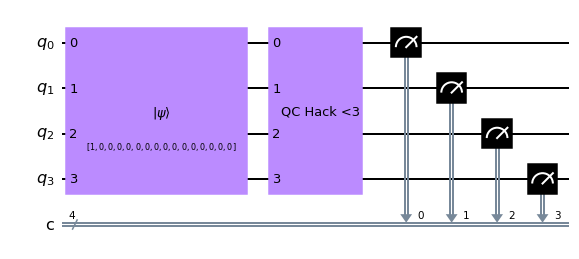

ibmqfactory.load_account:WARNING:2021-10-11 13:33:53,121: Credentials are already in use. The existing account in the session will be replaced.


0000


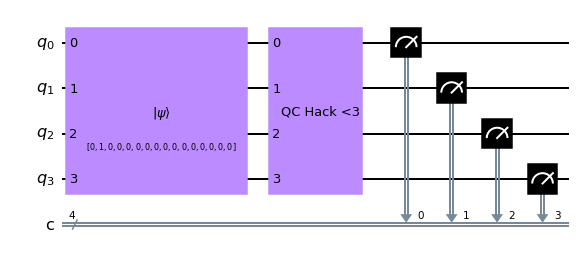

ibmqfactory.load_account:WARNING:2021-10-11 13:34:00,011: Credentials are already in use. The existing account in the session will be replaced.


0001


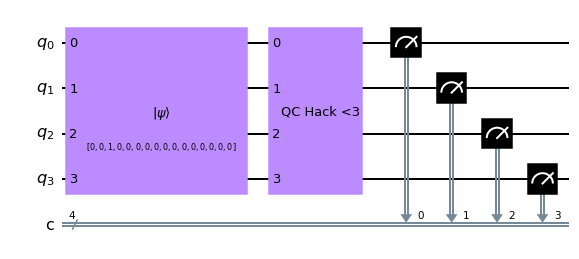

ibmqfactory.load_account:WARNING:2021-10-11 13:34:06,432: Credentials are already in use. The existing account in the session will be replaced.


0010


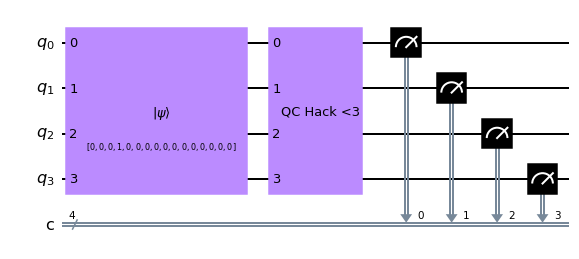

ibmqfactory.load_account:WARNING:2021-10-11 13:34:13,245: Credentials are already in use. The existing account in the session will be replaced.


0011


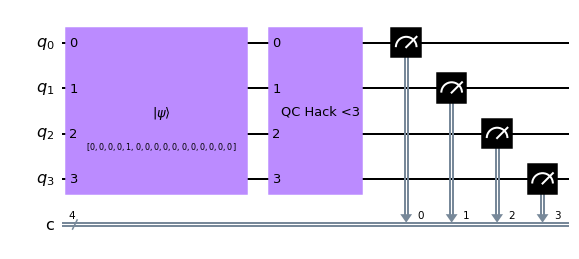

ibmqfactory.load_account:WARNING:2021-10-11 13:34:20,052: Credentials are already in use. The existing account in the session will be replaced.


0101


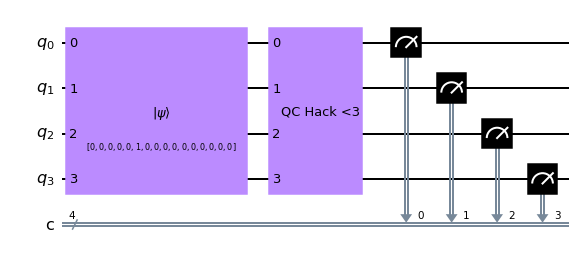

ibmqfactory.load_account:WARNING:2021-10-11 13:34:27,059: Credentials are already in use. The existing account in the session will be replaced.


0110


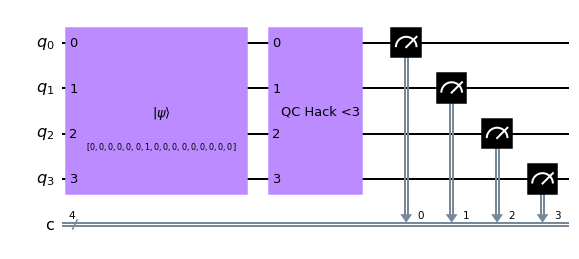

ibmqfactory.load_account:WARNING:2021-10-11 13:34:33,693: Credentials are already in use. The existing account in the session will be replaced.


0111


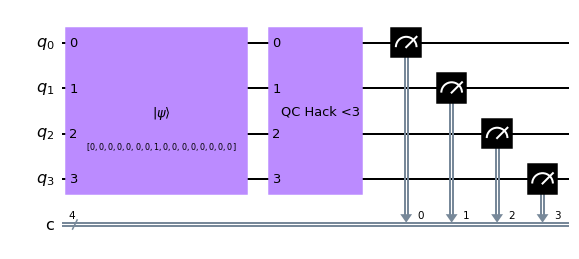

ibmqfactory.load_account:WARNING:2021-10-11 13:34:40,033: Credentials are already in use. The existing account in the session will be replaced.


0100


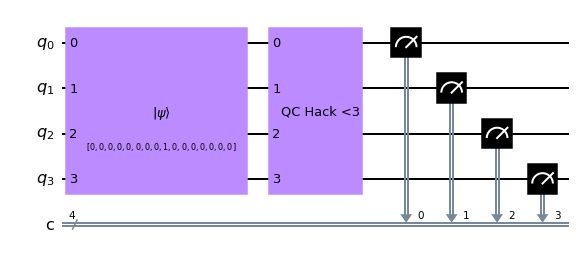

ibmqfactory.load_account:WARNING:2021-10-11 13:34:46,990: Credentials are already in use. The existing account in the session will be replaced.


1010


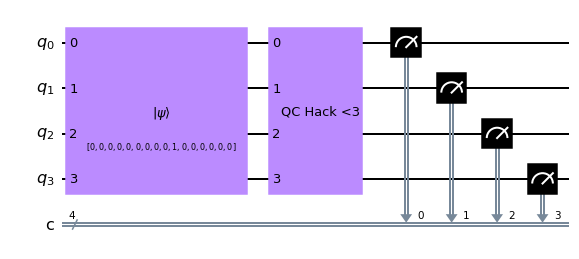

ibmqfactory.load_account:WARNING:2021-10-11 13:34:53,269: Credentials are already in use. The existing account in the session will be replaced.


1011


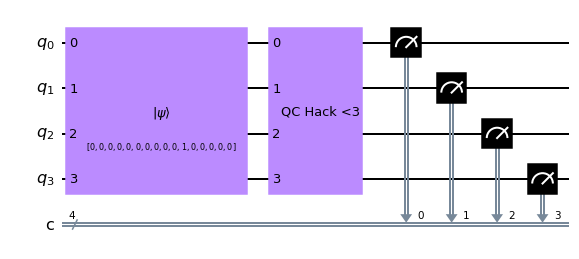

ibmqfactory.load_account:WARNING:2021-10-11 13:34:59,520: Credentials are already in use. The existing account in the session will be replaced.


1000


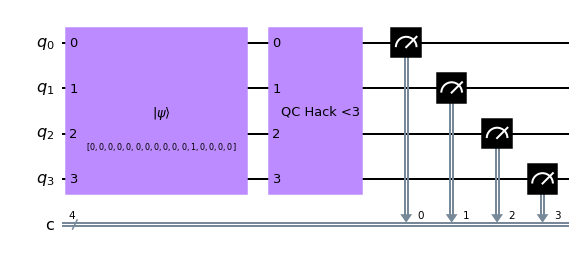

ibmqfactory.load_account:WARNING:2021-10-11 13:35:05,653: Credentials are already in use. The existing account in the session will be replaced.


1001


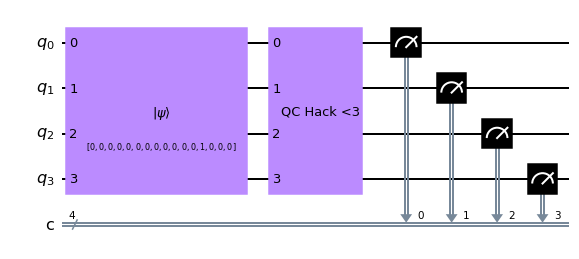

ibmqfactory.load_account:WARNING:2021-10-11 13:35:12,585: Credentials are already in use. The existing account in the session will be replaced.


1111


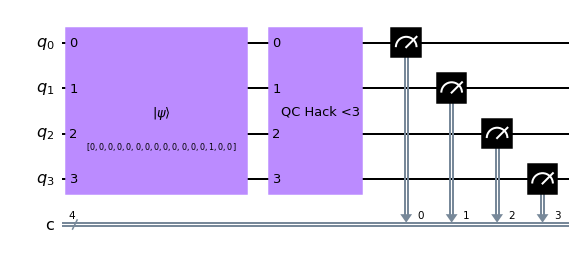

ibmqfactory.load_account:WARNING:2021-10-11 13:35:19,028: Credentials are already in use. The existing account in the session will be replaced.


1100


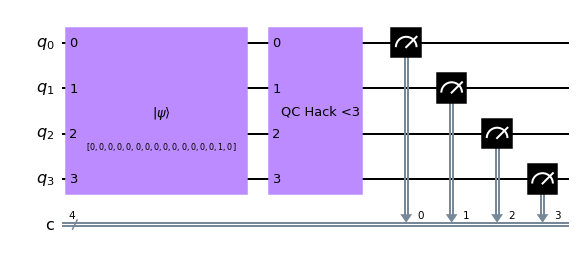

ibmqfactory.load_account:WARNING:2021-10-11 13:35:24,565: Credentials are already in use. The existing account in the session will be replaced.


1101


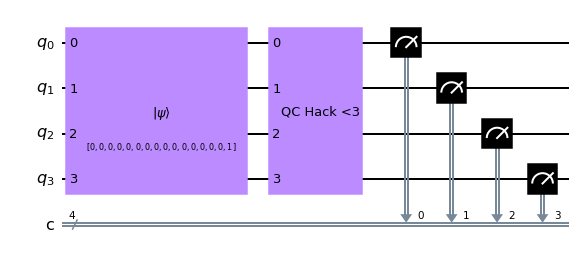

ibmqfactory.load_account:WARNING:2021-10-11 13:35:31,926: Credentials are already in use. The existing account in the session will be replaced.


1110


In [20]:
check_custom_unitary()

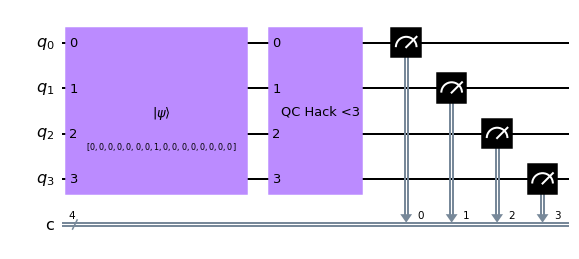

In [21]:
i = 7
binary = get_bin(i, 4)
sv = Statevector.from_label(str(binary))
        
qc = QuantumCircuit(4,4)
all_reg = [0,1,2,3]

qc.initialize(sv)
custom_gate = q_ext.UnitaryGate(un_matrix, label = 'QC Hack <3')
qc.append(custom_gate, all_reg)
qc.measure(all_reg, all_reg)
display(qc.draw('mpl'))

In [36]:
for kk in range(4):
    trans_qc = transpile(qc, basis_gates=['cx', 'u3'], optimization_level=kk)
    
    #display(trans_qc.draw())
    print('Optimization Level {}'.format(kk))
    print('Depth:', trans_qc.depth())
    print('Gate counts:', trans_qc.count_ops())

Optimization Level 0
Depth: 278
Gate counts: OrderedDict([('u3', 214), ('cx', 83), ('reset', 4), ('measure', 4)])
Optimization Level 1
Depth: 159
Gate counts: OrderedDict([('u3', 87), ('cx', 81), ('measure', 4)])
Optimization Level 2
Depth: 117
Gate counts: OrderedDict([('u3', 66), ('cx', 61), ('measure', 4)])
Optimization Level 3
Depth: 116
Gate counts: OrderedDict([('u3', 68), ('cx', 60), ('measure', 4)])


In [23]:
un_matrix = np.zeros((16, 16))

un_matrix[0,0] = 1
un_matrix[1,1] = 1
un_matrix[2,2] = 1
un_matrix[3,3] = 1

un_matrix[4,5] = 1
un_matrix[5,6] = 1
un_matrix[6,7] = 1
un_matrix[7,4] = 1

un_matrix[8,10] = 1
un_matrix[9,11] = 1
un_matrix[10,8] = 1
un_matrix[11,9] = 1

un_matrix[12,15] = 1
un_matrix[13,12] = 1
un_matrix[14,13] = 1
un_matrix[15,14] = 1

un_matrix.T

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [30]:
# Create an operator
unit_op = Operator(un_matrix)

# Add to a circuit
circ = QuantumCircuit(4, 4)
circ.append(unit_op, [0, 1, 2, 3])

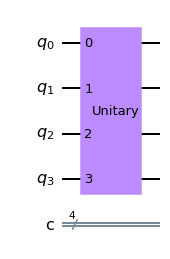

In [31]:
circ.draw('mpl')